<a href="https://colab.research.google.com/github/SultanaNawaz1460/Digital-Signal-Processing-DSP-/blob/main/Project_3ConvolutionTechnique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Observing convolution technique in signal processing.

# PROCEDURE:
1. We have the impulse response of a system as h(n) = { 3,2,1,-2,1,0,-4,0,3}
2. For x(n)={1,-2,3,-4,3,2,1}
#Task-1 a:
1-Run the following code and comment on the output
2. Calculate the length of input signal (N) and impulse response (M) used in above task?
3. Calculate the length of the output sequence and verify the result with N+M-1
4. Try to learn, explore the code and make notes.
5. Now modify the above code such that h(n)= {3,2, 1, -2,1,0,-4,0,3}(origin is shifted) and check for causality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

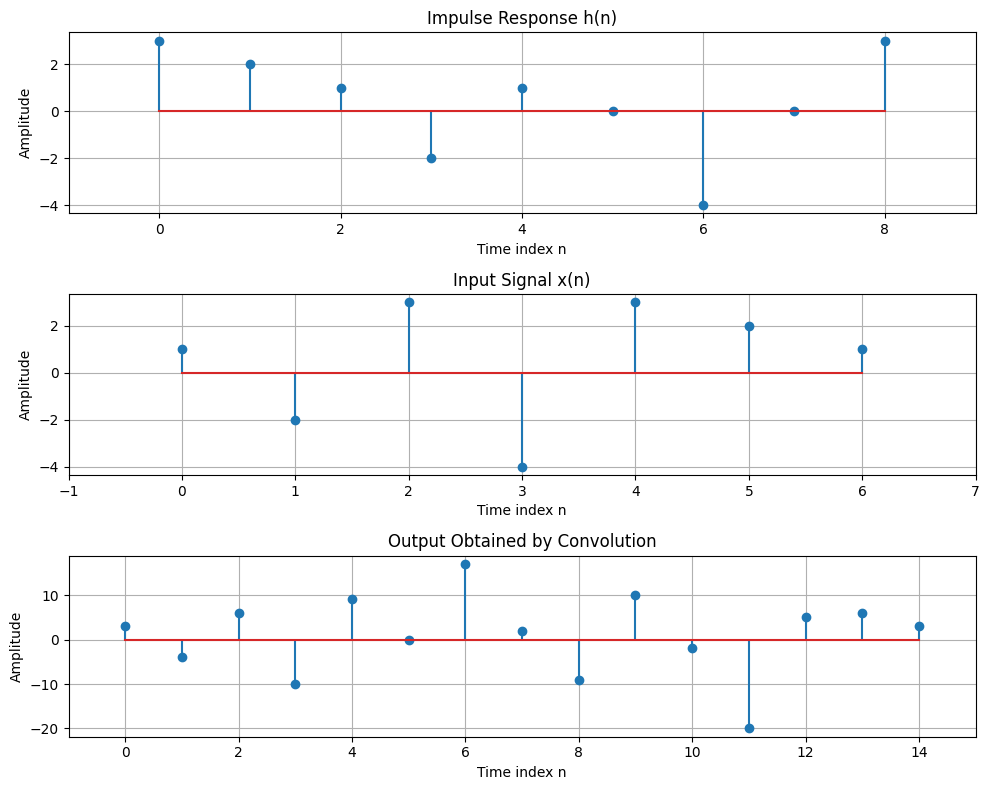

In [ ]:
# Define impulse response
h = np.array([3, 2, 1, -2, 1, 0, -4, 0, 3])  # Impulse response
org_h = 1  # Sample number where origin exists
nh = np.arange(len(h)) - org_h + 1  # Time indices for h

# Define input sequence
x = np.array([1, -2, 3, -4, 3, 2, 1])  # Input sequence
org_x = 1  # Sample number where origin exists
nx = np.arange(len(x)) - org_x + 1  # Time indices for x

# Perform convolution
y = np.convolve(h, x)  # Convolution of h and x
ny = np.arange(nh[0] + nx[0], nh[-1] + nx[-1] + 1)  # Time indices for y

# Plot impulse response
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.stem(nh, h)
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.xlim([nh[0] - 1, nh[-1] + 1])
plt.title('Impulse Response h(n)')
plt.grid()

# Plot input signal
plt.subplot(3, 1, 2)
plt.stem(nx, x)
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.xlim([nx[0] - 1, nx[-1] + 1])
plt.title('Input Signal x(n)')
plt.grid()

# Plot output signal
plt.subplot(3, 1, 3)
plt.stem(ny, y)
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.xlim([ny[0] - 1, ny[-1] + 1])
plt.title('Output Obtained by Convolution')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

# Task-2 :
1. What will happen if we input x(n)={0,0,1,0,0} into the above system.
2. Can you prove the commutative property of the convolution?
3. Modify the code to prove Associative and Distributed properties of the convolution.
4. Convolve your recorded sound with drumloop.wav. Note your observation
a) Plot the output.
b) Listen the output

Associative Property Verified ✅
Distributive Property Verified ✅


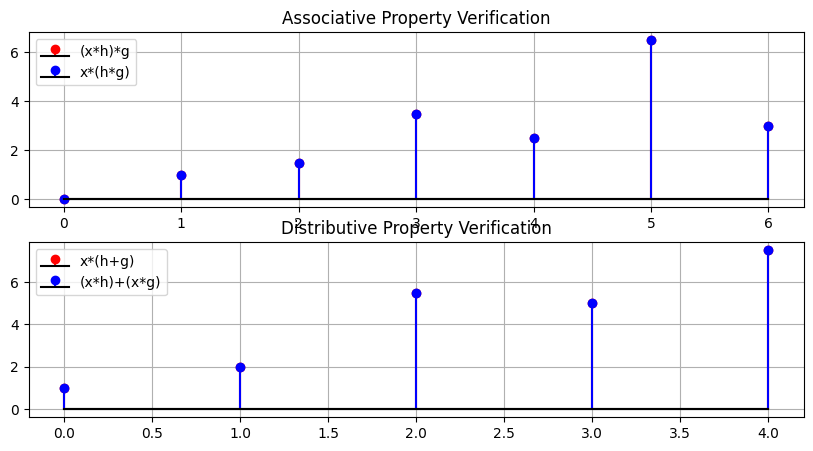

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define three sequences
x = np.array([1, 2, 3])
h = np.array([0, 1, 0.5])
g = np.array([1, -1, 2])

# Compute convolution for Associative Property
y1 = np.convolve(np.convolve(x, h), g)  # (x * h) * g
y2 = np.convolve(x, np.convolve(h, g))  # x * (h * g)

# Verify Associative Property
assert np.allclose(y1, y2), "Associative Property Failed"
print("Associative Property Verified ✅")

# Compute convolution for Distributive Property
lhs = np.convolve(x, h + g)  # x * (h + g)
rhs = np.convolve(x, h) + np.convolve(x, g)  # (x * h) + (x * g)

# Verify Distributive Property
assert np.allclose(lhs, rhs), "Distributive Property Failed"
print("Distributive Property Verified ✅")

# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.stem(y1, linefmt="r-", markerfmt="ro", basefmt="k-")
plt.stem(y2, linefmt="b-", markerfmt="bo", basefmt="k-")
plt.title("Associative Property Verification")
plt.legend(["(x*h)*g", "x*(h*g)"])
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(lhs, linefmt="r-", markerfmt="ro", basefmt="k-")
plt.stem(rhs, linefmt="b-", markerfmt="bo", basefmt="k-")
plt.title("Distributive Property Verification")
plt.legend(["x*(h+g)", "(x*h)+(x*g)"])
plt.grid()

plt.show()


## Task 3:
Step 1: Generate an Original Signal
1. Create a sine wave signal as the original signal.
o Use a sampling frequency Hz.
o Signal duration: 2 seconds.
o Signal frequency: 440 Hz (A4 note).
Hint: Use numpy to create a time array and generate a sine wave.
Step 2: Add Echo to the Signal
1. Define parameters for the echo:
o Delay: 0.2 seconds
o Attenuation factor
2. Add the echo to the original signal by creating a delayed and scaled copy of it.
Hint: Calculate the delay in samples and create an array for the echoed signal with zeros for the delay.
Step 4: Design the Impulse Response for Echo Cancellation
1. Create an impulse response with:
o 1 at index 0
o at the delayed index
Hint: Use a numpy array initialized with zeros and set the appropriate indices.
Step 5: Cancel the Echo Using Convolution
1. Convolve the echoed signal with the impulse response to recover the original signal.
Hint: Use numpy's convolution function with the mode set to 'valid'.
Step 6: Visualize and Compare the Signals
1. Plot the following:
o Original signal
o Signal with echo
o Recovered signal
Hint: Use matplotlib to create subplots for each signal. Label axes and add titles.
Step 7: Save the Signals
1. Save the signals as WAV files for verification:
o Original signal
o Signal with echo
o Recovered signal
Hint: Use scipy.io.wavfile.write to save each signal. Convert the signal to 16-bit integers before saving.
1. Python code implementation.
2. Plots of the original signal, signal with echo, and recovered signal.
3. WAV files for the three signals.
Discussion Questions in report
1. What happens to the signal quality if the echo attenuation factor is close to 1?
2. How does the delay parameter affect the impulse response?
3. Can this method cancel echoes with multiple delays? Why or why not?

Recording... Speak now!
Recording complete!


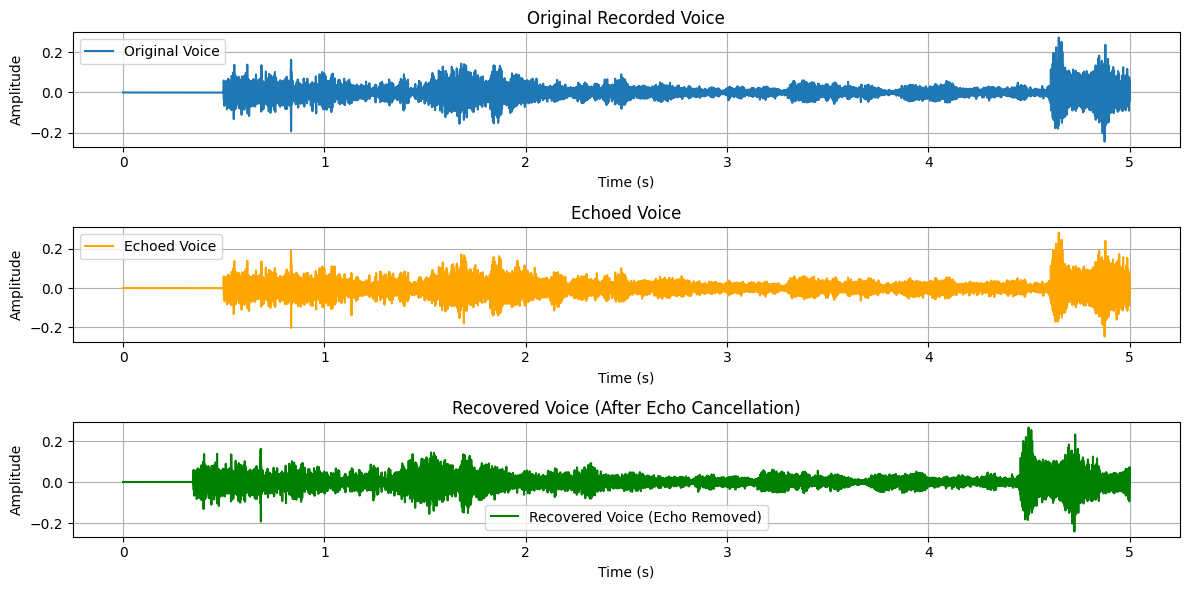

Playing Original Recorded Voice...
Playing Echoed Voice...
Playing Recovered Voice...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf

#  Record Voice
fs = 44100  # Sampling frequency
duration = 5
print("Recording... Speak now!")
recorded_voice = sd.rec(int(fs * duration), samplerate=fs, channels=1, dtype='float32')
sd.wait()
print("Recording complete!")

# Save
sf.write("recorded_voice.wav", recorded_voice, fs)

# Step 2: Echo Effect
delay_time = 0.3  # Echo delay in seconds
attenuation = 0.5  # Echo attenuation factor
delay_samples = int(delay_time * fs)  # Convert delay to samples

# Create the echoed signal
echo_signal = np.zeros_like(recorded_voice)
echo_signal[delay_samples:] = recorded_voice[:-delay_samples] * attenuation  # Delayed and attenuated copy

# Combine original voice with the echo
echoed_voice = recorded_voice + echo_signal

# Save the echoed voice
sf.write("echoed_voice.wav", echoed_voice, fs)

# Step 3: Design an Impulse Response for Echo Cancellation
impulse_response = np.zeros(delay_samples + 1)
impulse_response[0] = 1  # Original signal
impulse_response[-1] = -attenuation  # Echo cancellation

# Step 4: Apply Echo Cancellation using Convolution
recovered_voice = np.convolve(echoed_voice.flatten(), impulse_response, mode="same")

# Save the recovered (echo-removed) voice
sf.write("recovered_voice.wav", recovered_voice, fs)

# Step 5: Plot the Signals
time_axis = np.linspace(0, duration, len(recorded_voice))

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(time_axis, recorded_voice, label="Original Voice")
plt.title("Original Recorded Voice")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time_axis, echoed_voice, label="Echoed Voice", color="orange")
plt.title("Echoed Voice")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time_axis, recovered_voice[:len(recorded_voice)], label="Recovered Voice (Echo Removed)", color="green")
plt.title("Recovered Voice (After Echo Cancellation)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Step 6: Play the Recorded, Echoed, and Recovered Voices
print("Playing Original Recorded Voice...")
sd.play(recorded_voice, fs)
sd.wait()

print("Playing Echoed Voice...")
sd.play(echoed_voice, fs)
sd.wait()

print("Playing Recovered Voice...")
sd.play(recovered_voice[:len(recorded_voice)], fs)
sd.wait()


# Applying  convolution on the image signal  

# Task 4 a): Change the above code and add stronger blurring using Edge-Preserving Bilateral Filtering
#Task 4 b) Reconstruct the original image signal

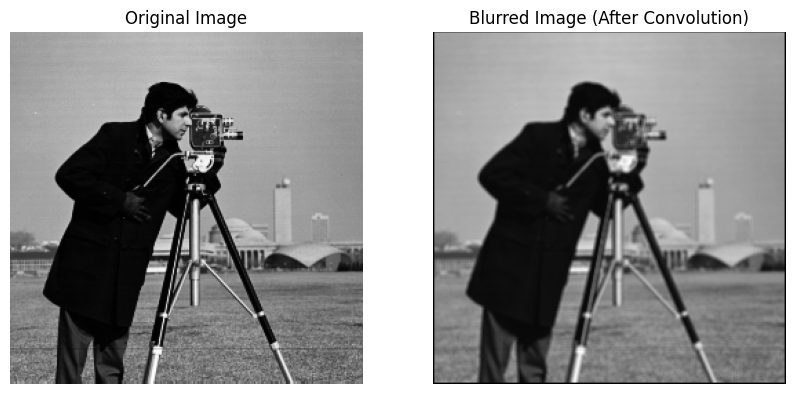

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Image in Grayscale
im = cv2.imread('Cameraman.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Define the Kernel (3×3 Averaging Filter)
mask = np.ones((3, 3)) / 9 # Normalized to maintain brightness balance

# Step 3: Prepare an Output Array
im_conv = np.zeros_like(im)

# Step 4: Perform Convolution (Filtering)
for i in range(1, im.shape[0] - 1):  # Loop through rows (excluding border pixels)
    for j in range(1, im.shape[1] - 1):  # Loop through columns (excluding border pixels)
        # Element-wise multiplication and summation
        im_conv[i, j] = np.sum(im[i-1:i+2, j-1:j+2] * mask)

# Step 5: Display Original and Blurred Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_conv, cmap='gray')
plt.title("Blurred Image (After Convolution)")
plt.axis('off')

plt.show()


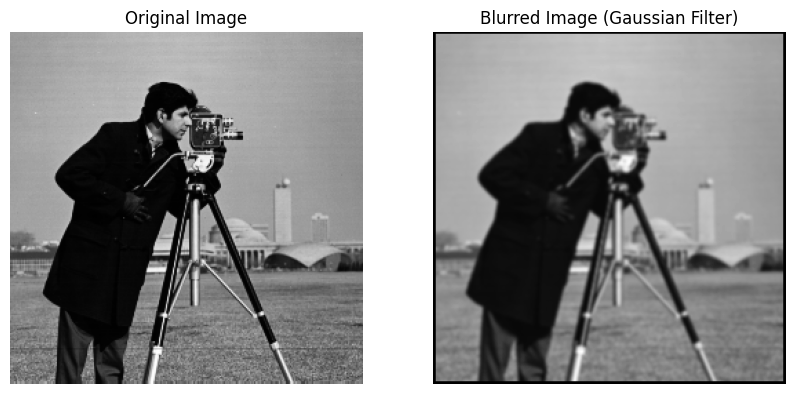

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Image in Grayscale
im = cv2.imread('Cameraman.png', cv2.IMREAD_GRAYSCALE)


mask = np.array([[1, 4, 6, 4, 1],
                 [4, 16, 24, 16, 4],
                 [6, 24, 36, 24, 6],
                 [4, 16, 24, 16, 4],
                 [1, 4, 6, 4, 1]]) / 256  # Normalized Gaussian filter


im_conv = np.zeros_like(im)

# Step 4: Perform Convolution (Filtering)
for i in range(2, im.shape[0] - 2):  # Loop through rows (excluding border pixels)
    for j in range(2, im.shape[1] - 2):  # Loop through columns (excluding border pixels)
        # Element-wise multiplication and summation
        im_conv[i, j] = np.sum(im[i-2:i+3, j-2:j+3] * mask)

# Step 5: Display Original and Blurred Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_conv, cmap='gray')
plt.title("Blurred Image (Gaussian Filter)")
plt.axis('off')

plt.show()


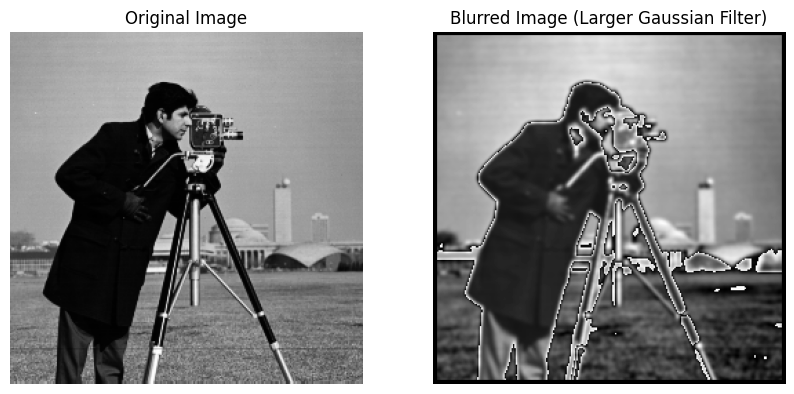

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Image in Grayscale
im = cv2.imread('Cameraman.png', cv2.IMREAD_GRAYSCALE)

mask = np.array([[1,  6, 15, 20, 15,  6,  1],
                 [6, 36, 90, 120, 90, 36,  6],
                 [15, 90, 225, 300, 225, 90, 15],
                 [20, 120, 300, 400, 300, 120, 20],
                 [15, 90, 225, 300, 225, 90, 15],
                 [6, 36, 90, 120, 90, 36,  6],
                 [1,  6, 15, 20, 15,  6,  1]]) / 1600  # Normalized larger Gaussian filter

# Step 3: Prepare an Output Array
im_conv = np.zeros_like(im)

# Step 4: Perform Convolution (Filtering)
for i in range(3, im.shape[0] - 3):  # Loop through rows (excluding border pixels)
    for j in range(3, im.shape[1] - 3):  # Loop through columns (excluding border pixels)
        # Element-wise multiplication and summation
        im_conv[i, j] = np.sum(im[i-3:i+4, j-3:j+4] * mask)

# Step 5: Display Original and Blurred Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_conv, cmap='gray')
plt.title("Blurred Image (Larger Gaussian Filter)")
plt.axis('off')

plt.show()


C:\Program Files\KMSpico\temp\ipykernel_19300\1836654715.py:36: RuntimeWarning: overflow encountered in scalar negative
  intensity_weight = np.exp(-((img[i, j] - img[i + m, j + n])**2) / (2 * sigma_color**2))
C:\Program Files\KMSpico\temp\ipykernel_19300\1836654715.py:36: RuntimeWarning: overflow encountered in scalar subtract
  intensity_weight = np.exp(-((img[i, j] - img[i + m, j + n])**2) / (2 * sigma_color**2))


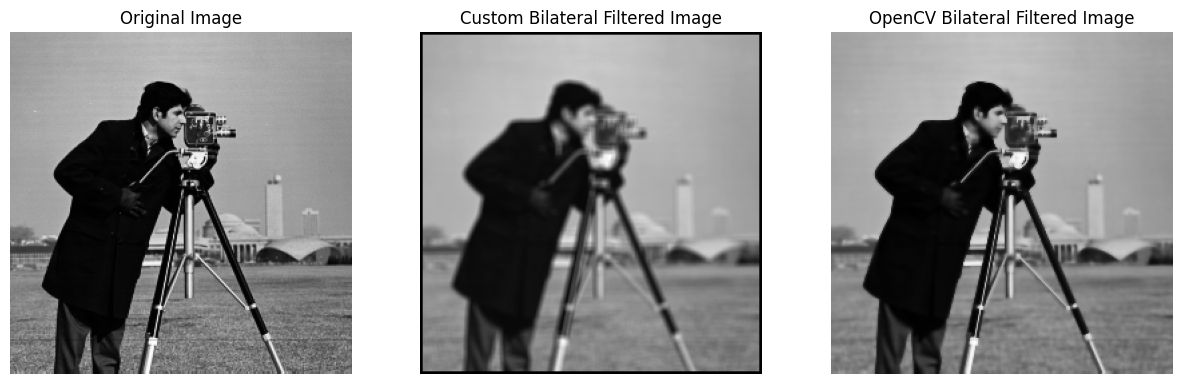

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Image in Grayscale
im = cv2.imread('Cameraman.png', cv2.IMREAD_GRAYSCALE)

# Parameters for Bilateral Filter
diameter = 5  # Diameter of the pixel neighborhood
sigma_color = 75  # Standard deviation for intensity difference
sigma_space = 75  # Standard deviation for spatial distance

# Step 2: Define Bilateral Filter Function
def bilateral_filter(img, diameter, sigma_color, sigma_space):
    # Get the image dimensions
    rows, cols = img.shape
    filtered_img = np.zeros_like(img, dtype=np.float32)

    # Half of the kernel size (diameter)
    half_diameter = diameter // 2

    # Loop through every pixel
    for i in range(half_diameter, rows - half_diameter):
        for j in range(half_diameter, cols - half_diameter):
            # Initialize weights and the new pixel value
            weight_sum = 0
            pixel_value = 0

            # Loop through the neighboring pixels
            for m in range(-half_diameter, half_diameter + 1):
                for n in range(-half_diameter, half_diameter + 1):
                    # Calculate spatial distance
                    spatial_weight = np.exp(-(m**2 + n**2) / (2 * sigma_space**2))

                    # Calculate intensity difference
                    intensity_weight = np.exp(-((img[i, j] - img[i + m, j + n])**2) / (2 * sigma_color**2))

                    # Multiply both weights
                    weight = spatial_weight * intensity_weight

                    # Add the weighted pixel value to the sum
                    pixel_value += img[i + m, j + n] * weight
                    weight_sum += weight

            # Normalize and assign the new pixel value
            filtered_img[i, j] = pixel_value / weight_sum

    return np.uint8(filtered_img)

# Step 3: Apply Bilateral Filter
bilateral_filtered_img = bilateral_filter(im, diameter, sigma_color, sigma_space)

# Step 4: Compare with OpenCV's Bilateral Filter
opencv_bilateral_filtered_img = cv2.bilateralFilter(im, diameter, sigma_color, sigma_space)

# Step 5: Display Original, Custom Bilateral Filtered, and OpenCV Bilateral Filtered Images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bilateral_filtered_img, cmap='gray')
plt.title("Custom Bilateral Filtered Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_bilateral_filtered_img, cmap='gray')
plt.title("OpenCV Bilateral Filtered Image")
plt.axis('off')

plt.show()
